## Goals
Consider 3 charge distributions: a 1D case and two 2D cases. 

First, a charged line,
$$\lambda(x) = 2x; 0 < x < 1$$

Second, a charged ’L’ made from two charged lines - one parallel to the x axis and the other parallel to the y axis
$$
\begin{align}
    \lambda(x; y) &= x^2, 0 < x < 1\\
                  &= y, 1 < y < 2
\end{align}
$$

Third, a charge disk in the x-y plane, centered at the origin plane with a radius of 2 and a charge distribution of
$$
\sigma(r,\phi)=rcos(\phi)
$$

Write a program in Python and MATLAB to calculate the (i) electric potential and (ii) electric field in the vicinity of
each charge distribution. Graph the electric potential and electric field (try a 3D plot for the field).


$$
V(\vec{r}) = \frac{1}{4\pi\epsilon_0}\int \frac{\rho (\vec{r}')}{|\vec{r}-\vec{r}'|} d^3r'
$$
$$
E(\vec{r}) = - \nabla V(\vec{r})
$$

In rectangular coordinate,
$$
V(x,y,z) = \frac{1}{4\pi\epsilon_0}\int \frac{\rho (x',y',z')}{\sqrt{(x-x')^2+(y-y')^2+(z-z')^2}} dx'dy'dz'
$$


In [1]:
import numpy as np
from scipy.integrate import quad, dblquad
import matplotlib.pyplot as plt

In [2]:
epsilon_0 = 8.85e-12        # vacuum permittivity in F/m
k = 4*np.pi*epsilon_0       # electrostatic const.

## Case 1: Line charge

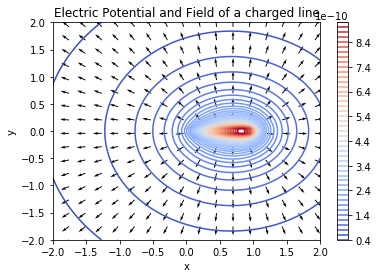

In [3]:
N = 50
V = np.zeros((N,N))
xrange = np.linspace(-2,2,N)
yrange = np.linspace(-2,2,N)

xv, yv = np.meshgrid(xrange,yrange,indexing='ij')

##---------------------------------------------------------------
# Calculate potential at every point using scipy.integrate.quad
# Calculate electric field using np.gradient
##---------------------------------------------------------------

for i in range(N):
    for j in range(N):
        x = xrange[i]
        y = yrange[j]
        z = 0
        f1 = lambda xp: k * 2*xp/np.sqrt((x - xp)**2 + y**2 + z**2)
        V[i,j], Verr = quad(f1,0,1,points=0)

Ex, Ey = np.gradient(-V)
E = np.sqrt(Ex**2 + Ey**2)  #Magnitude of electric field
Exn, Eyn = Ex/E, Ey/E       #Normalization


plt.figure()
plt.contour(xv,yv,V,50,cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Potential and Field of a charged line')

skip = (slice(None, None, 3), slice(None, None, 3)) #slice array to display little arrows every 3 points
plt.quiver(xv[skip],yv[skip],Exn[skip],Eyn[skip])

plt.show()



## Case 2: L-shaped charge

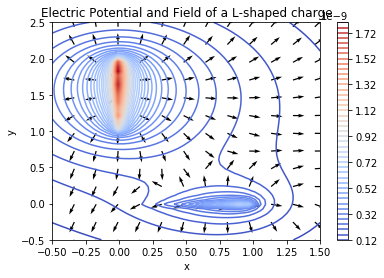

In [4]:
N = 50
V21 = np.zeros((N,N))
V22 = np.zeros((N,N))
xrange = np.linspace(-0.5,1.5,N)
yrange = np.linspace(-0.5,2.5,N)

xv, yv = np.meshgrid(xrange,yrange,indexing='ij')

##---------------------------------------------------------------
# Integrate potential in x and y directions, respectively
# Sum V21 and V22 to get total potential
##---------------------------------------------------------------
for i in range(N):
    for j in range(N):
        x = xrange[i]
        y = yrange[j]
        z = 0
        f21 = lambda xp: k * xp**2 /np.sqrt((x - xp)**2 + y**2 + z**2)
        f22 = lambda yp: k * yp /np.sqrt(x**2 + (y - yp)**2 + z**2)
        V21[i,j], Verr = quad(f21,0,1)
        V22[i,j], Verr = quad(f22,1,2)

V2 = V21 + V22
Ex, Ey = np.gradient(-V2)
E = np.sqrt(Ex**2 + Ey**2)
Exn, Eyn = Ex/E, Ey/E


plt.figure()
plt.contour(xv,yv,V2,50,cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Potential and Field of a L-shaped charge')

skip = (slice(None, None, 4), slice(None, None, 4))
plt.quiver(xv[skip],yv[skip],Exn[skip],Eyn[skip])
plt.show()

## Case 3: Disc charge

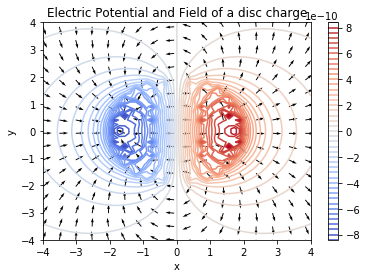

In [10]:
N = 50
V3 = np.zeros((N,N))
xrange = np.linspace(-4,4,N)
yrange = np.linspace(-4,4,N)

xv, yv = np.meshgrid(xrange,yrange,indexing='ij')

##---------------------------------------------------------------
# Calculate potential at every point using scipy.integrate.dblquad
# f3(tp,rp) over rp from 0 to 2, tp from 0 to 2*pi
##---------------------------------------------------------------

for i in range(N):
    for j in range(N):
        x = xrange[i]
        y = yrange[j]
        z = 0
        f3_rect = lambda xp, yp: k * xp /np.sqrt((x - xp)**2 + (y - yp)**2 + z**2)
        f3_polar = lambda theta, r: f3_rect(r*np.cos(theta),r*np.sin(theta))*r
        V3[i,j], Verr = dblquad(f3_polar, 0, 2, lambda x: 0, lambda x: 2*np.pi)

Ex, Ey = np.gradient(-V3)
E = np.sqrt(Ex**2 + Ey**2)  #Magnitude of electric field
Exn, Eyn = Ex/E, Ey/E       #Normalization


plt.figure()
plt.contour(xv,yv,V3,50,cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Potential and Field of a disc charge')

skip = (slice(None, None, 3), slice(None, None, 3)) #slice array to display little arrows every 3 points
plt.quiver(xv[skip],yv[skip],Exn[skip],Eyn[skip])

plt.show()

